<a href="https://colab.research.google.com/github/araldi/Python_for_biomedical_data_analysis/blob/main/06_and_07_Python_data_visualization_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data and prepare the datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/Homework_part_03_04_data.csv')

In [ ]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/Homework_part_03_04_dictionary.csv')
dictionary.head()

,Unnamed: 0,Description,Code
0,0,Gender,31-0.0
1,1,Height [cm],50-0.0
2,2,Weight [Kg],21002-0.0
3,3,Waist circumference [cm],48-0.0
4,4,Hip circumference [cm],49-0.0


In [ ]:
# rename the dataframe columns

# dictionary comprehenesion converts a tuple in a dictionary
# dict((key, func(key)) for key in keys)
dictionary_columns = dict( (dictionary.loc[i, 'Code'], dictionary.loc[i, 'Description']) for i in dictionary.index)

# or using zip (makes tuples out of equally sized series/arrays)
dictionary_columns = dict(zip(dictionary['Code'], dictionary['Description']))

df = df.rename(columns = dictionary_columns)

df.head()

,Unnamed: 0,Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Weight [Kg]
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [ ]:
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
sales_data = pd.read_csv('company_sales_data.csv')

--2022-10-12 12:28:22--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:2b25, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2022-10-12 12:28:23 (78.1 MB/s) - ‘company_sales_data.csv’ saved [659/659]



In [ ]:
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/Python_for_biomedical_data_analysis/main/Files/CD93_exomeSNPs_annotation.csv")
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [ ]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Exercise 1

Plot the total revenue of the chipotle items (like above, but considering item_price (remember that the dollars have to be converted into numbers!).

<BarContainer object of 50 artists>

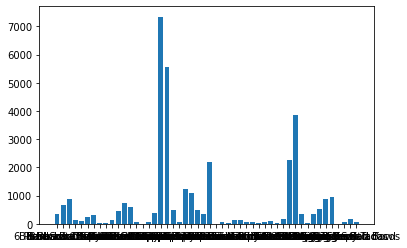

In [ ]:
chipotle['price'] = chipotle['item_price'].str.split('$').str[1].astype(float)
to_plot = chipotle.groupby('item_name').sum('price')
plt.bar(to_plot.index, to_plot['price'])

#ugly

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text major ticklabel objects>)

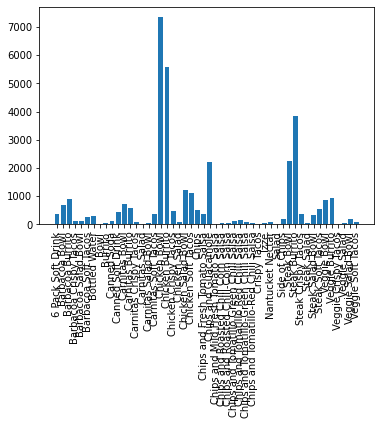

In [ ]:
# try again
chipotle['price'] = chipotle['item_price'].str.split('$').str[1].astype(float)
to_plot = chipotle.groupby('item_name').sum('price')
plt.bar(to_plot.index, to_plot['price'])
plt.xticks(rotation=90)


### Exercise 2

Plot how many males and females are in the df dataset.

In [ ]:
df['Gender']

0         0.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
499209    0.0
499210    1.0
499211    0.0
499212    0.0
499213    1.0
Name: Gender, Length: 499214, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


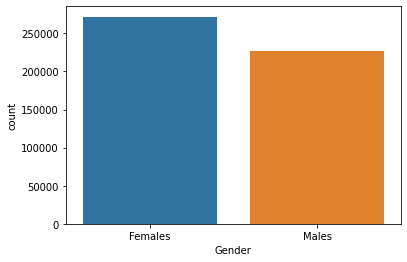

In [ ]:
dict_gender = {0:'Females', 1:'Males'}
sns.countplot(df['Gender'].map(dict_gender))


### Exercise 3

Plot the average waist circumference and hip circumference measurement of males and females (two plots).

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Waist circumference in a population')

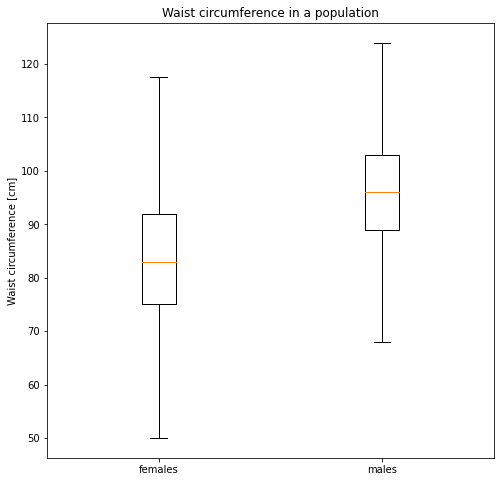

In [ ]:
plt.figure(figsize = (8,8))

data = [df[df['Gender'] == 0]['Waist circumference [cm]'], df[df['Gender'] == 1]['Waist circumference [cm]']] #give a series of data to plot
plt.boxplot(data, showfliers=False, labels = ['females', 'males']) #and assign labels
plt.ylabel('Waist circumference [cm]')
plt.title('Waist circumference in a population')

### Exercise 4

Plot two boxplots describing PolyPhen and SIFT scores of Variant consequences of the SNPs dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

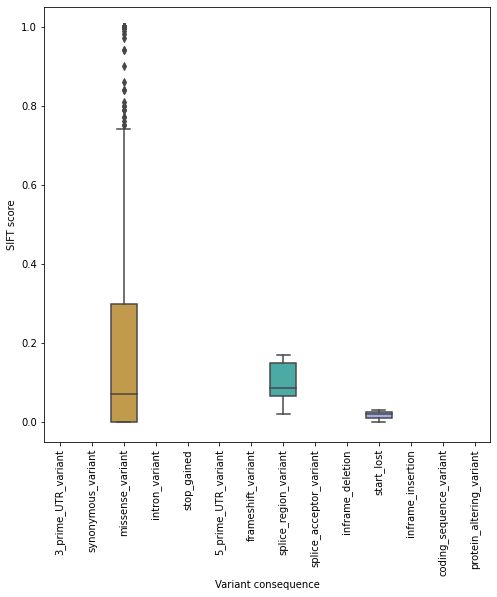

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Variant consequence", y = 'SIFT score', data = SNPs)#, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of SIFT score in SNPs')

Text(0.5, 1.0, 'Distribution of PolyPhen score in SNPs')

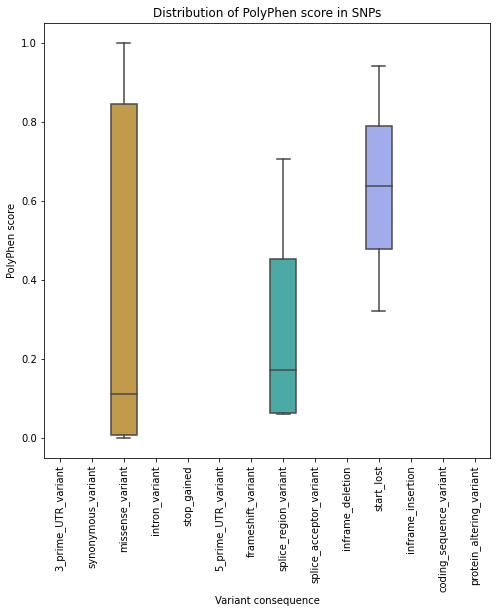

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Variant consequence", y = 'PolyPhen score', data = SNPs)#, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of PolyPhen score in SNPs')

## Exercise 5
Plot the moisturizer sales, showing only data from May until September.

HINT: use xlim()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(sales_data['month_number'], sales_data['moisturizer'])
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.ylim(0,) # restrict the limit
plt.xlim(5,10) # restrict the limit

## Exercise 7

Plot the distribution of tips between male and female servers

Text(0, 0.5, 'bills')

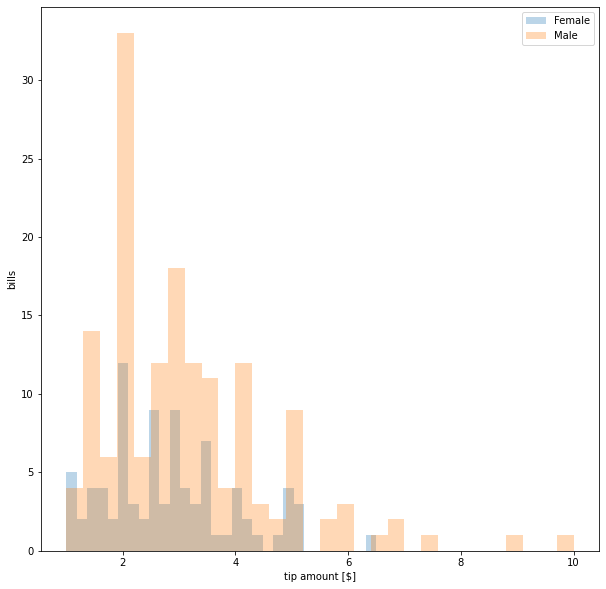

In [ ]:
plt.figure(figsize = (10,10))
for gender in ['Female', "Male"]:
  subset = tips[tips['sex'] == gender]
  plt.hist(subset['tip'], bins = 30, alpha = 0.3, label = gender)
plt.legend()
plt.xlabel('tip amount [$]')
plt.ylabel('bills')

## Exercise 8


Plot the distribution of tips in the tips dataset for each day of the week.

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'bills')

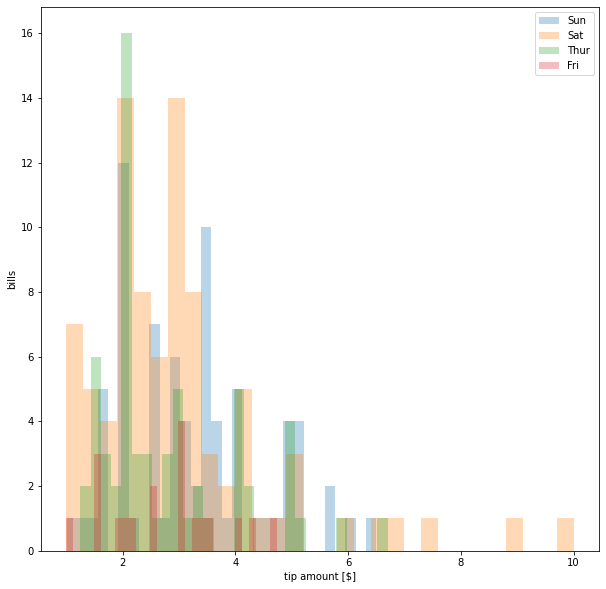

In [ ]:
plt.figure(figsize = (10,10))
for day in tips['day'].unique():
  subset = tips[tips['day'] == day]
  plt.hist(subset['tip'], bins = 30, alpha = 0.3, label = day)
plt.legend()
plt.xlabel('tip amount [$]')
plt.ylabel('bills')

## Exercise 9

Plot total bill vs tip amount in every day of the week (tips dataset).


Text(0, 0.5, 'Tip [$]')

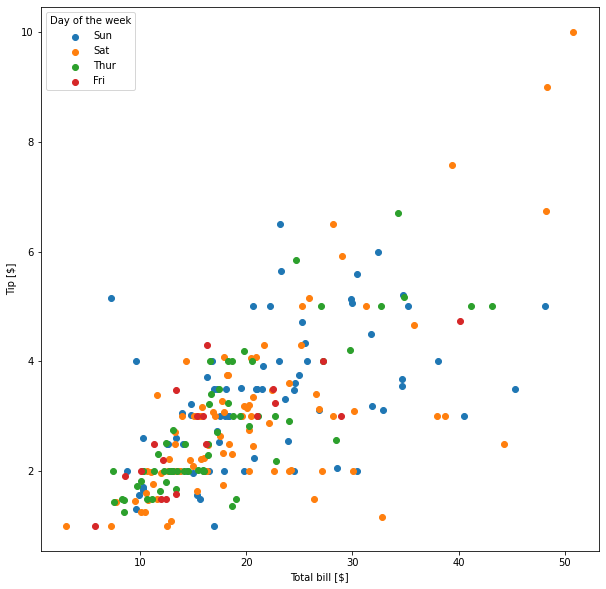

In [ ]:
plt.figure(figsize = (10,10))
for day in tips['day'].unique():
  subset = tips[tips['day'] == day]
  plt.scatter(subset['total_bill'], subset['tip'], label = day)

plt.legend(title='Day of the week')
plt.xlabel("Total bill [$]")
plt.ylabel('Tip [$]')